# Week2授業前課題4（任意課題） ダーツ投げ問題

## 1.このテキストについて
＊本課題は任意課題です。提出は必須ではありません。  
<u>テキストの目的</u>  
・確率分布を意識的に用いた実装に触れる  
・Pythonのディクショナリに触れる  

<u>どのように学ぶか</u>  
ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。シミューレーションと言っても動画ではなく、以下のようなものを作成します。

<img src="https://t.gyazo.com/teams/diveintocode/e888876e843d33ba847e87f3015c4d7f.png">

注意していただきたいのは、**ダーツのまとを選ぶ行為とダーツの矢が刺さる場所** をプログラミングでどう表現するかです。


そしてダーツ投げの実装を通して、確率分布やディクショナリについても学んでいきます。

## 2.確率分布とは
ここでは確率分布について述べます。まずはイメージを掴んでもらうため、数式についてはここでは触れません。


例としてある会社の株価について考えます。この株価は次の日 
1
2
 の確率で上がるかもしれないし、下がるかもしれません。なぜ 
1
2
 なのかというと、株価が変動するという事象は「上がる」もしくは「下がる」の2通りしかない からです。（変わらないという事象を考慮すれば、3通りなので 
1
3
 になります。）


これをサイコロに適用すると、サイコロを振った時に各目の出る確率は 
1
6
 になります。言うまでもないかもしれませんが、サイコロの目は[1,2,3,4,5,6]の6種類だからです。


株価とサイコロの例では、全ての事象に対して均等に起こりえるので、各事象が同じ確率で起こりえます。数式で表現すると以下のようになります。

$
\mathrm{確率} = \frac{1}{\mathrm{起こりえる事象の数}}
$

各目のでる確率をグラフで描画すると以下のようになります。

<img src="https://t.gyazo.com/teams/diveintocode/3721e1113fbfe8a0d396729b743fa6b9.png">

当然ですが、全て同じ確率で出るのでグラフの高さは同じになります。このように全ての事象に対して確率が同じ（一様）である分布を **一様分布**　と言います。


一様分布は全ての事象が等しい確率で起きていますが、身の回りの出来事に目を向けると均等な確率では発生しない事象の方が多いと思います。


株価の変動、地震、日本人の年齢などは当然ですが、全ての事象において均等には発生していないです（地震はほとんどが震度3以下、株価も大暴落は数年に一度、日本人の年齢分布は高齢化が進んでいるので均等でないことはわかると思います）。


今挙げた3つの例からもわかるように、**世の中全ての事象はその事象特有の規模と頻度（人口ならば年齢と人数）** の関係があります。そしてその規模と頻度の関係を可視化したものを一般的に **確率分布** と言います（上に描画されている一様分布も確率分布の一つです）。


そして地震や株価のようにデータ（事象）が離散的な場合の確率分布を **離散確率分布** 、データ（事象）が連続的な場合の確率分布を **連続確率分布**　と言います。



## 3.ディクショナリ
ここでは、ディクショナリについて説明していきます。そして本課題を実装する過程でディクショナリを使います。

<u>ディクショナリとは</u>  
ディクショナリの説明をする前に配列について述べます。まず例として以下の配列を考えましょう。

```python
test = ["800万", "4人", "40才", "男"]
```

配列は、list型と呼ばれるミュータブル（値の変更が可能）なデータ型です。上のtest配列の各要素には[“年収”, “家族人数”, “年齢”, “性別”]という別々な情報が格納されているとします。


もしこのtest配列からデータを取り出したい場合、test配列には、[“年収”, “家族人数”, “年齢”, “性別”]という情報が保持されていないので、**どの要素に何の情報が格納されているか**　を覚えておかなくてはなりません。今の例のように要素が少ない場合には問題ないですが、要素数が増えた場合に各要素が何の情報を意味するのか認識しておくのは困難になります。


なので、あらかじめ **各要素が何を意味しているのかという情報も要素と一緒に保存しておこう** というのがディクショナリのモチベーションです。すなわち各要素に対して、そのラベルもセットで保存するイメージです。

<u>ディクショナリのkeyとvalue</u>  
それではディクショナリの使い方について述べていきます。


test配列を、各要素の情報（[“年収”, “家族人数”, “年齢”, “性別”]）と一緒にディクショナリとして格納すると以下のようになります。ディクショナリを定義する際は{}を用いることに注意してください。

```python
test = {"年収":"800万", "家族人数":"4人", "年齢":"40才", "性別":"男"}
```

ディクショナリの要素の「:」の左側をkey、右側をkeyに対するvalue（値）と言います。今の例では、[“年収”, “家族人数”, “年齢”, “性別”]はtestディクショナリのkeyであり、[“800万”, “4人”, “40才”, “男”]が各keyに対するvalue（値）になります。


こうすれば、valueが意味する情報も紐づいているので、valueの紐づいている情報を覚えておく必要もないわけです。今の例では、valueが全て文字列になっていますが、当然int型やfloat型もディクショナリのvalueになりえます。

<u>ディクショナリのメソッド</u>  
ここではディクショナリのメソッドについて紹介していきます。本課題を解くのに必要なメソッドもあるので、どんな操作なのか理解しておきましょう。


以下のディクショナリを例にみていきます。サッカーW杯の優勝回数上位6ヶ国（key）とその優勝回数(value)を格納したものです。


hist_worldcup = {“ブラジル”:5, “ドイツ”:4, “イタリア”:4, “アルゼンチン”:2, “フランス”:2,
“イングランド”:1}


**《keyを取り出す》**   
keys()を用いることで、全てのkeyを一括で取り出すことができます。
```python
hist_worldcup.keys()
→dict_keys(['ブラジル', 'ドイツ', 'イタリア', 'アルゼンチン', 'フランス', 'イングランド'])
```

**《valueを取り出す》**  
values()を用いることでvalueを一括で取り出すことができます。

```python
hist_worldcup.values()
→dict_values([5, 4, 4, 2, 2, 1])
```

**《任意のkeyに対するvalueを取り出す》**  
get()を用いることで、()の中で指定したkeyに対するvalueを取り出すことができます。
```python
hist_worldcup.get("ブラジル")
→5
```

**《keyとvalueを取り出す》**  
items()を用いるとディクショナリに登録されているkeyとvalueが要素であるタプルのリストを返してくれます。

```python
hist_worldcup.items()
→dict_items([('ブラジル', 5), ('ドイツ', 4), ('イタリア', 4), ('アルゼンチン', 2), ('フランス', 2), ('イングランド', 1)])
```

In [13]:
hist_worldcup = {"ブラジル":5, "ドイツ":4, "イタリア":4, "アルゼンチン":2, "フランス":2,
"イングランド":1}

print("keys:{}".format(hist_worldcup.keys()))
print("values:{}".format(hist_worldcup.values()))
print("ブラジルの優勝回数:{}".format(hist_worldcup.get("ブラジル")))

hist_worldcup.items()

keys:dict_keys(['ブラジル', 'ドイツ', 'イタリア', 'アルゼンチン', 'フランス', 'イングランド'])
values:dict_values([5, 4, 4, 2, 2, 1])
ブラジルの優勝回数:5


dict_items([('ブラジル', 5), ('ドイツ', 4), ('イタリア', 4), ('アルゼンチン', 2), ('フランス', 2), ('イングランド', 1)])

dict_itemsオブジェクト型の中にリスト型オブジェクト、さらにそのリスト型オブジェクトの中にタプルが格納されています。一つずつ取り出したい場合は、以下のようにfor文などと組み合わせます。

In [14]:
for key, value in hist_worldcup.items():
    print(key, value)

ブラジル 5
ドイツ 4
イタリア 4
アルゼンチン 2
フランス 2
イングランド 1


ディクショナリの基本的なメソッドは以上です。他にも機械学習を扱う中で利用する機能はありますが、これらを知っているだけで様々な操作が可能です。この後の問題で実際に使い確認していきましょう。

## 4.ダーツ投げのシミュレーションの作成
実装する上での前提条件を以下に示します。


・複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
・ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。


１. ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）  
２. サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）  
３. ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）  
４. 1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）  
５. 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）  

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。

## 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。


《ヒント》


「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [24]:
import numpy as np
def dice_choice():
    dice = list(range(1, 7))
    #dice_choice = np.random.choice(dice)
    return np.random.choice(dice)

In [61]:
dice_choice()

2

## 【問題2】ダーツを投げて、刺さった場所を記録する(【問題3】と混合)
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。**正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。** 刺さった場所（座標）は、配列で保持するようにしてください。


《ヒント》


ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。


また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。


## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。


《ヒント》


「ダーツを1000回投げる」というのは **問題1のサイコロを1000回振る**　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。



In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def play_darts(arrow_number):
    mean = [0, 0]
    cov = [[0.01, 0], [0, 0.01]]
    
    # 格納する辞書型
    dict_result = {}    
    
    # 一旦リストに保持させる
    array_result1 = []
    array_result2 = []
    array_result3 = []
    array_result4 = []
    array_result5 = []
    array_result6 = []    

    # 指定回数分ループ
    for i in range(arrow_number):
        num = dice_choice()
        values1 = np.random.multivariate_normal(mean, cov, 1)
        array1 = np.array(values1)
        if num == 1:
            array_result1.append(array1)
        elif num == 2:
            array_result2.append(array1)
        elif num == 3:
            array_result3.append(array1)
        elif num == 4:
            array_result4.append(array1)
        elif num == 5:
            array_result5.append(array1)
        elif num == 6:
            array_result6.append(array1)
        
    # ndarry型に変更
    ndarray_result1 = np.array(array_result1)
    ndarray_result2 = np.array(array_result2)
    ndarray_result3 = np.array(array_result3)
    ndarray_result4 = np.array(array_result4)  
    ndarray_result5 = np.array(array_result5)
    ndarray_result6 = np.array(array_result6)  
        
    # arrayの中にarrayを保持している為、3次元データ(個数ｘ（１ｘ２次元の2次元配列）)
    # となっているので2次元(nx2)に変換
    dict_result["1"]=ndarray_result1.reshape(ndarray_result1.shape[0], ndarray_result1.shape[2])
    dict_result["2"]=ndarray_result2.reshape(ndarray_result2.shape[0], ndarray_result2.shape[2])
    dict_result["3"]=ndarray_result3.reshape(ndarray_result3.shape[0], ndarray_result3.shape[2])
    dict_result["4"]=ndarray_result4.reshape(ndarray_result4.shape[0], ndarray_result4.shape[2])
    dict_result["5"]=ndarray_result5.reshape(ndarray_result5.shape[0], ndarray_result5.shape[2])
    dict_result["6"]=ndarray_result6.reshape(ndarray_result6.shape[0], ndarray_result6.shape[2])
    
    # 辞書を返す
    return dict_result
        
result = play_darts(10)

print("result[1].shape:\n{}".format(result["1"].shape))
print("result[2].shape:\n{}".format(result["2"].shape))
print("result[3].shape:\n{}".format(result["3"].shape))
print("result[4].shape:\n{}".format(result["4"].shape))  
print("result[5].shape:\n{}".format(result["5"].shape))
print("result[6].shape:\n{}".format(result["6"].shape)) 

print("result[1]:\n{}".format(result["1"]))
print("result[2]:\n{}".format(result["2"]))
print("result[3]:\n{}".format(result["3"]))
print("result[4]:\n{}".format(result["4"]))  
print("result[5]:\n{}".format(result["5"]))
print("result[6]:\n{}".format(result["6"])) 



result[1].shape:
(3, 2)
result[2].shape:
(3, 2)
result[3].shape:
(1, 2)
result[4].shape:
(1, 2)
result[5].shape:
(1, 2)
result[6].shape:
(1, 2)
result[1]:
[[ 0.0020749   0.12056998]
 [ 0.03766771 -0.23352108]
 [-0.02962167 -0.00415905]]
result[2]:
[[ 0.10226599 -0.07436839]
 [-0.10862926  0.04301634]
 [ 0.12935002  0.09660391]]
result[3]:
[[ 0.10963451 -0.17025939]]
result[4]:
[[-0.0772262  -0.00077484]]
result[5]:
[[-0.10850156  0.08725974]]
result[6]:
[[-0.0022388  -0.02228579]]


## 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。


matplotlibのpatchesクラスの公式ドキュメント


[matplotlib.patches.Circle — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Circle.html#matplotlib.patches.Circle)


[Mmh Donuts!!! — Matplotlib 3.1.1 documentation](https://matplotlib.org/gallery/shapes_and_collections/donut.html)


ここまで出来ていれば、最初に示したような図が描画されるはずです。

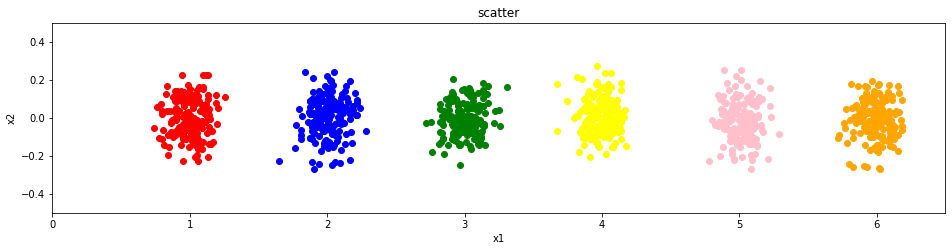

In [162]:
result = play_darts(1000)

plt.figure(figsize=(16, 3.5))
plt.scatter(result["1"][:,0] + 1, result["1"][:,1], color = "red")
plt.scatter(result["2"][:,0] + 2, result["2"][:,1], color = "blue")
plt.scatter(result["3"][:,0] + 3, result["3"][:,1], color = "green")
plt.scatter(result["4"][:,0] + 4, result["4"][:,1], color = "yellow")
plt.scatter(result["5"][:,0] + 5, result["5"][:,1], color = "pink")
plt.scatter(result["6"][:,0] + 6, result["6"][:,1], color = "orange")


plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(-0.5, 0.5)
plt.xlim(0, 6 + 0.5)
plt.title("scatter")

plt.show()

## 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。


《ヒント》


ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

In [163]:
def play_darts_custom(arrow_number):
    mean = [0, 0]
    cov = [[0.01, 0], [0, 0.01]]
    
    # 格納する辞書型
    dict_result = {}    
    
    # 一旦リストに保持させる
    array_result1 = []
    array_result2 = []
    array_result3 = []
    array_result4 = []
    array_result5 = []
    array_result6 = []    

    
    for i in range(arrow_number):
        num = dice_choice()
        values1 = np.random.multivariate_normal(mean, cov, 1)
        array1 = np.array(values1)
        if num == 1:
            array_result1.append(array1)
        elif num == 2:
            array_result2.append(array1)
        elif num == 3:
            array_result3.append(array1)
        elif num == 4:
            array_result4.append(array1)
        elif num == 5:
            array_result5.append(array1)
        elif num == 6:
            array_result6.append(array1)
        
    # ndarry型に変更
    ndarray_result1 = np.array(array_result1)
    ndarray_result2 = np.array(array_result2)
    ndarray_result3 = np.array(array_result3)
    ndarray_result4 = np.array(array_result4)  
    ndarray_result5 = np.array(array_result5)
    ndarray_result6 = np.array(array_result6)  
        
    # arrayの中にarrayを保持している為、3次元データ(個数ｘ（１ｘ２次元の2次元配列）)
    # となっているので2次元(nx2)に変換
    dict_result["1"]=ndarray_result1.reshape(ndarray_result1.shape[0], ndarray_result1.shape[2])
    dict_result["2"]=ndarray_result2.reshape(ndarray_result2.shape[0], ndarray_result2.shape[2])
    dict_result["3"]=ndarray_result3.reshape(ndarray_result3.shape[0], ndarray_result3.shape[2])
    dict_result["4"]=ndarray_result4.reshape(ndarray_result4.shape[0], ndarray_result4.shape[2])
    dict_result["5"]=ndarray_result5.reshape(ndarray_result5.shape[0], ndarray_result5.shape[2])
    dict_result["6"]=ndarray_result6.reshape(ndarray_result6.shape[0], ndarray_result6.shape[2])

    plt.figure(figsize=(16, 3.5))
    plt.scatter(dict_result["1"][:,0] + 1, dict_result["1"][:,1], color = "red")
    plt.scatter(dict_result["2"][:,0] + 2, dict_result["2"][:,1], color = "blue")
    plt.scatter(dict_result["3"][:,0] + 3, dict_result["3"][:,1], color = "green")
    plt.scatter(dict_result["4"][:,0] + 4, dict_result["4"][:,1], color = "yellow")
    plt.scatter(dict_result["5"][:,0] + 5, dict_result["5"][:,1], color = "pink")
    plt.scatter(dict_result["6"][:,0] + 6, dict_result["6"][:,1], color = "orange")

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.ylim(-0.5, 0.5)
    plt.xlim(0, 6 + 0.5)
    plt.title("scatter")

    plt.show()


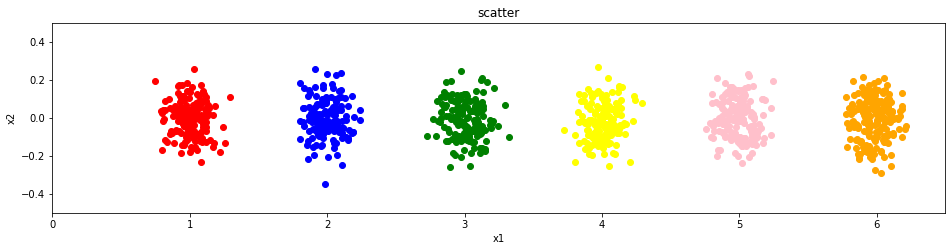

In [171]:
play_darts_custom(1000)